In [1]:
# import my library
import pandas as pd
import numpy as np
import network_analysis as net
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats
import random
from umap import UMAP
%matplotlib inline


c:\Users\ryansenne\anaconda3\envs\network\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\ryansenne\anaconda3\envs\network\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\ryansenne\anaconda3\envs\network\lib\site-packages\umap\distances.py:

In [2]:
from pathlib import Path
# path = Path("/home/ryansenne/PycharmProjects/Networks2/csv_files"
path = Path(r"C:\Users\ryansenne\PycharmProjects\network_analysis\csv_files")

my_allen_colors = net.get_allen_colors(path / "ROIs.csv")

In [3]:
# set some filepaths for network creation
chr2_of = path / 'ChR2_Large_Box.csv'
control_of = path / 'Control_Large_Box.csv'
chr2_small =  path / 'ChR2_Small_Box.csv'
control_small = path /'Control_Small_Box.csv'
innate_recall =  path / 'innate_recall.csv'

In [4]:
chr2_large_analysis = net.NetworkAnalysis(chr2_of)
chr2_large_analysis.create_network( p_threshold=0.01, global_threshold=0.0)

control_large_analysis = net.NetworkAnalysis(control_of)
control_large_analysis.create_network( p_threshold=0.01, global_threshold=0.0)

chr2_small_analysis = net.NetworkAnalysis(chr2_small)
chr2_small_analysis.create_network(p_threshold=0.01, global_threshold=0.0)

control_small_analysis = net.NetworkAnalysis(control_small)
control_small_analysis.create_network(p_threshold=0.01, global_threshold=0.0)

ir_analysis = net.NetworkAnalysis(innate_recall)
ir_analysis.create_network( p_threshold=0.01, global_threshold=0.0)


In [ ]:
len(control_large_analysis.G.edges())

100%|██████████| 1000/1000 [03:09<00:00,  5.28it/s]


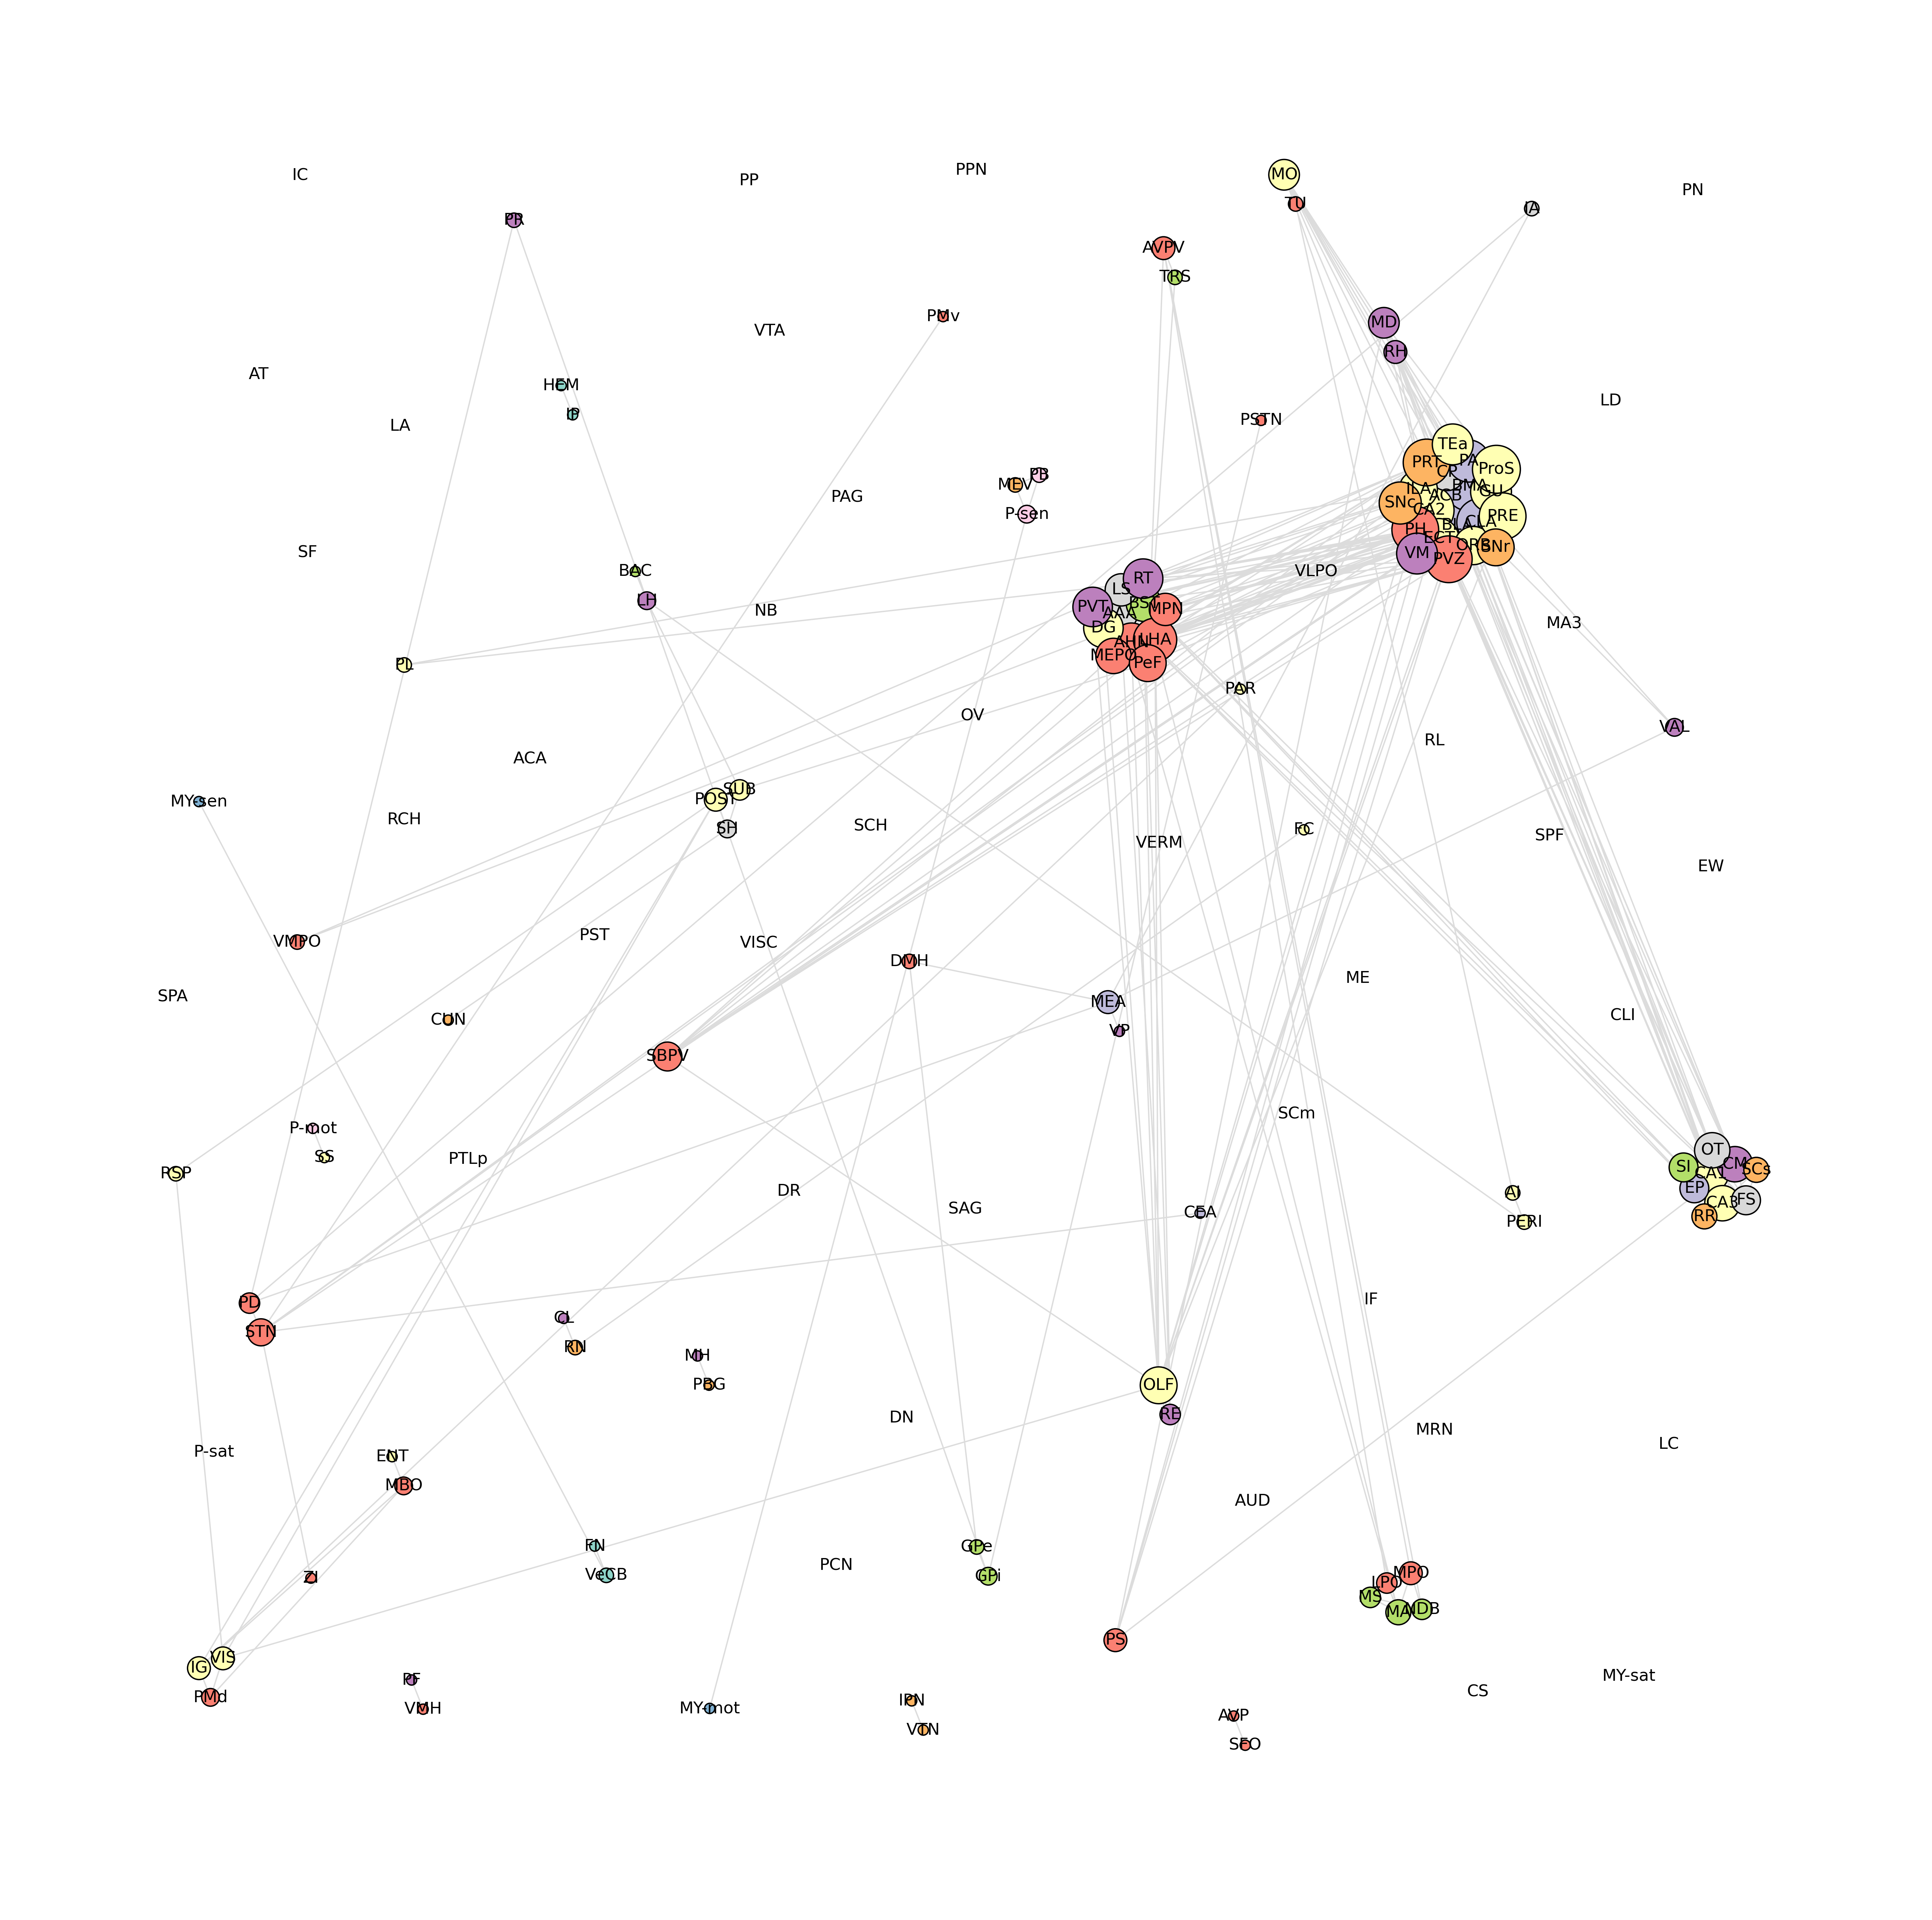

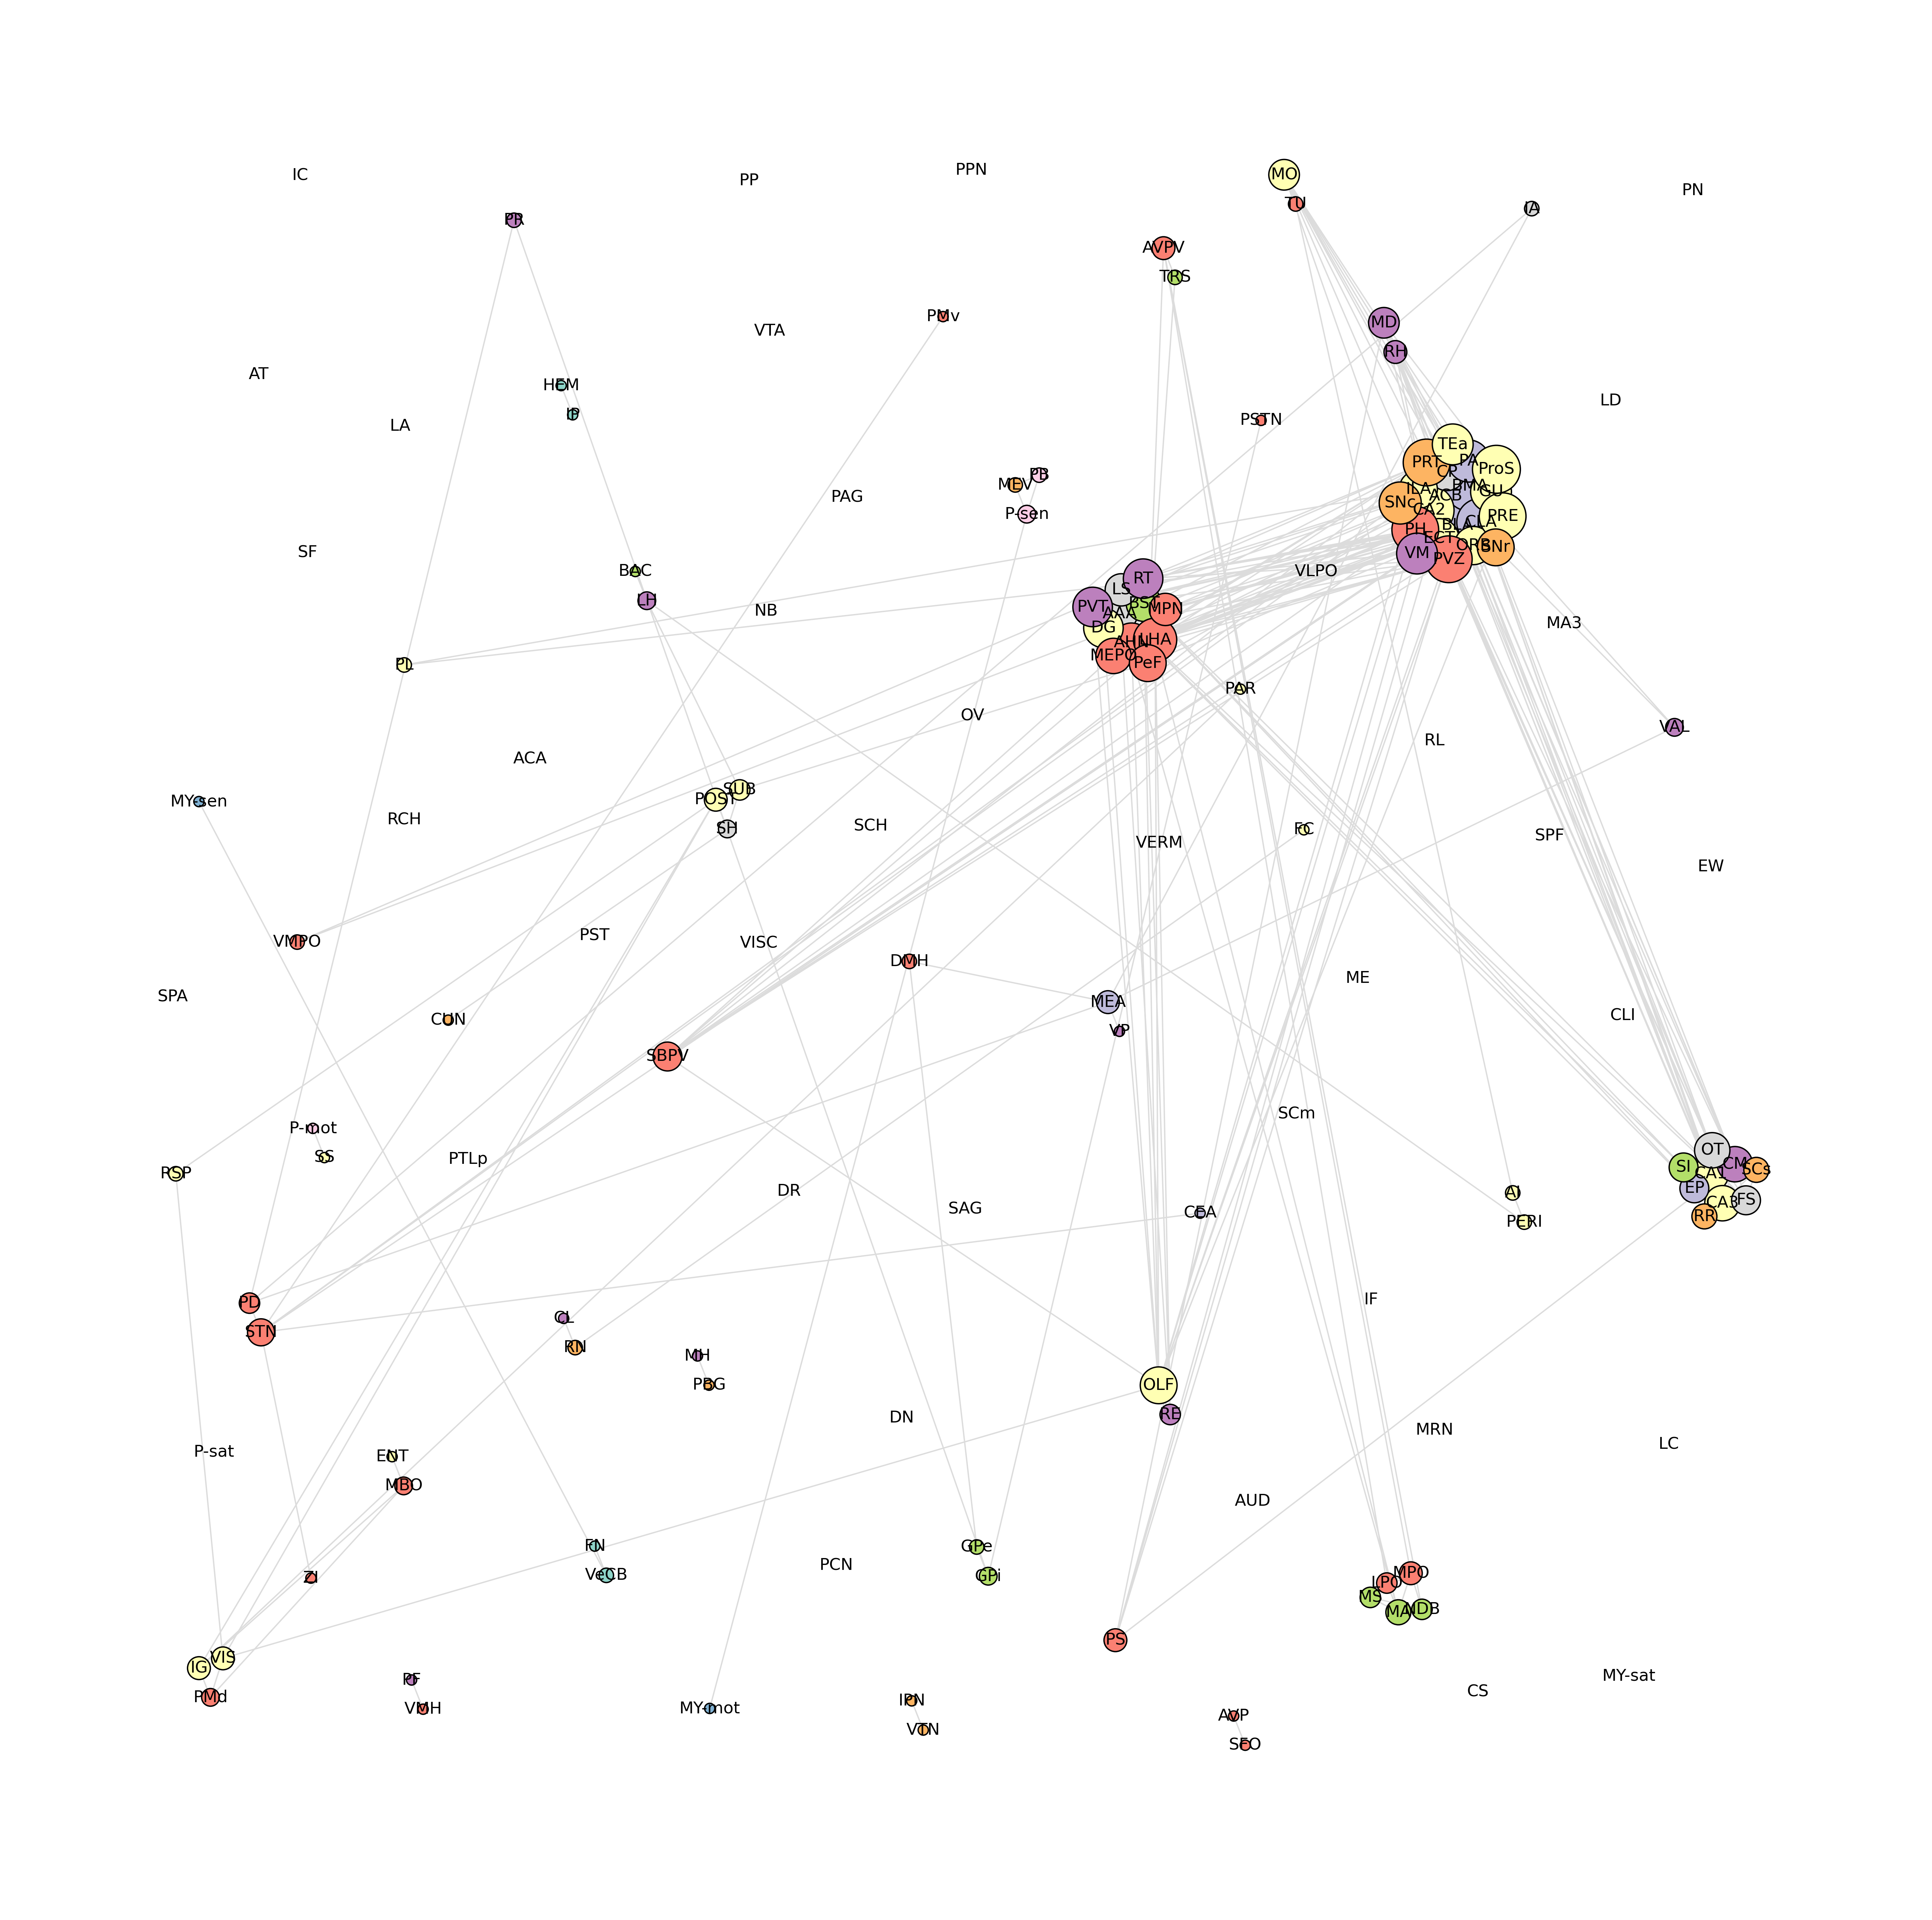

In [5]:
network = chr2_small_analysis
a, b, c = network.leiden_algorithm()
pos_dict = net.get_position_data(b, network.nodes, False)
net.graph_network(network.G, my_allen_colors, pos_dict)

In [ ]:
import collections
degree_sequence = sorted([d for n, d in chr2_large_analysis.G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.loglog(deg, cnt, linestyle='', marker='o')

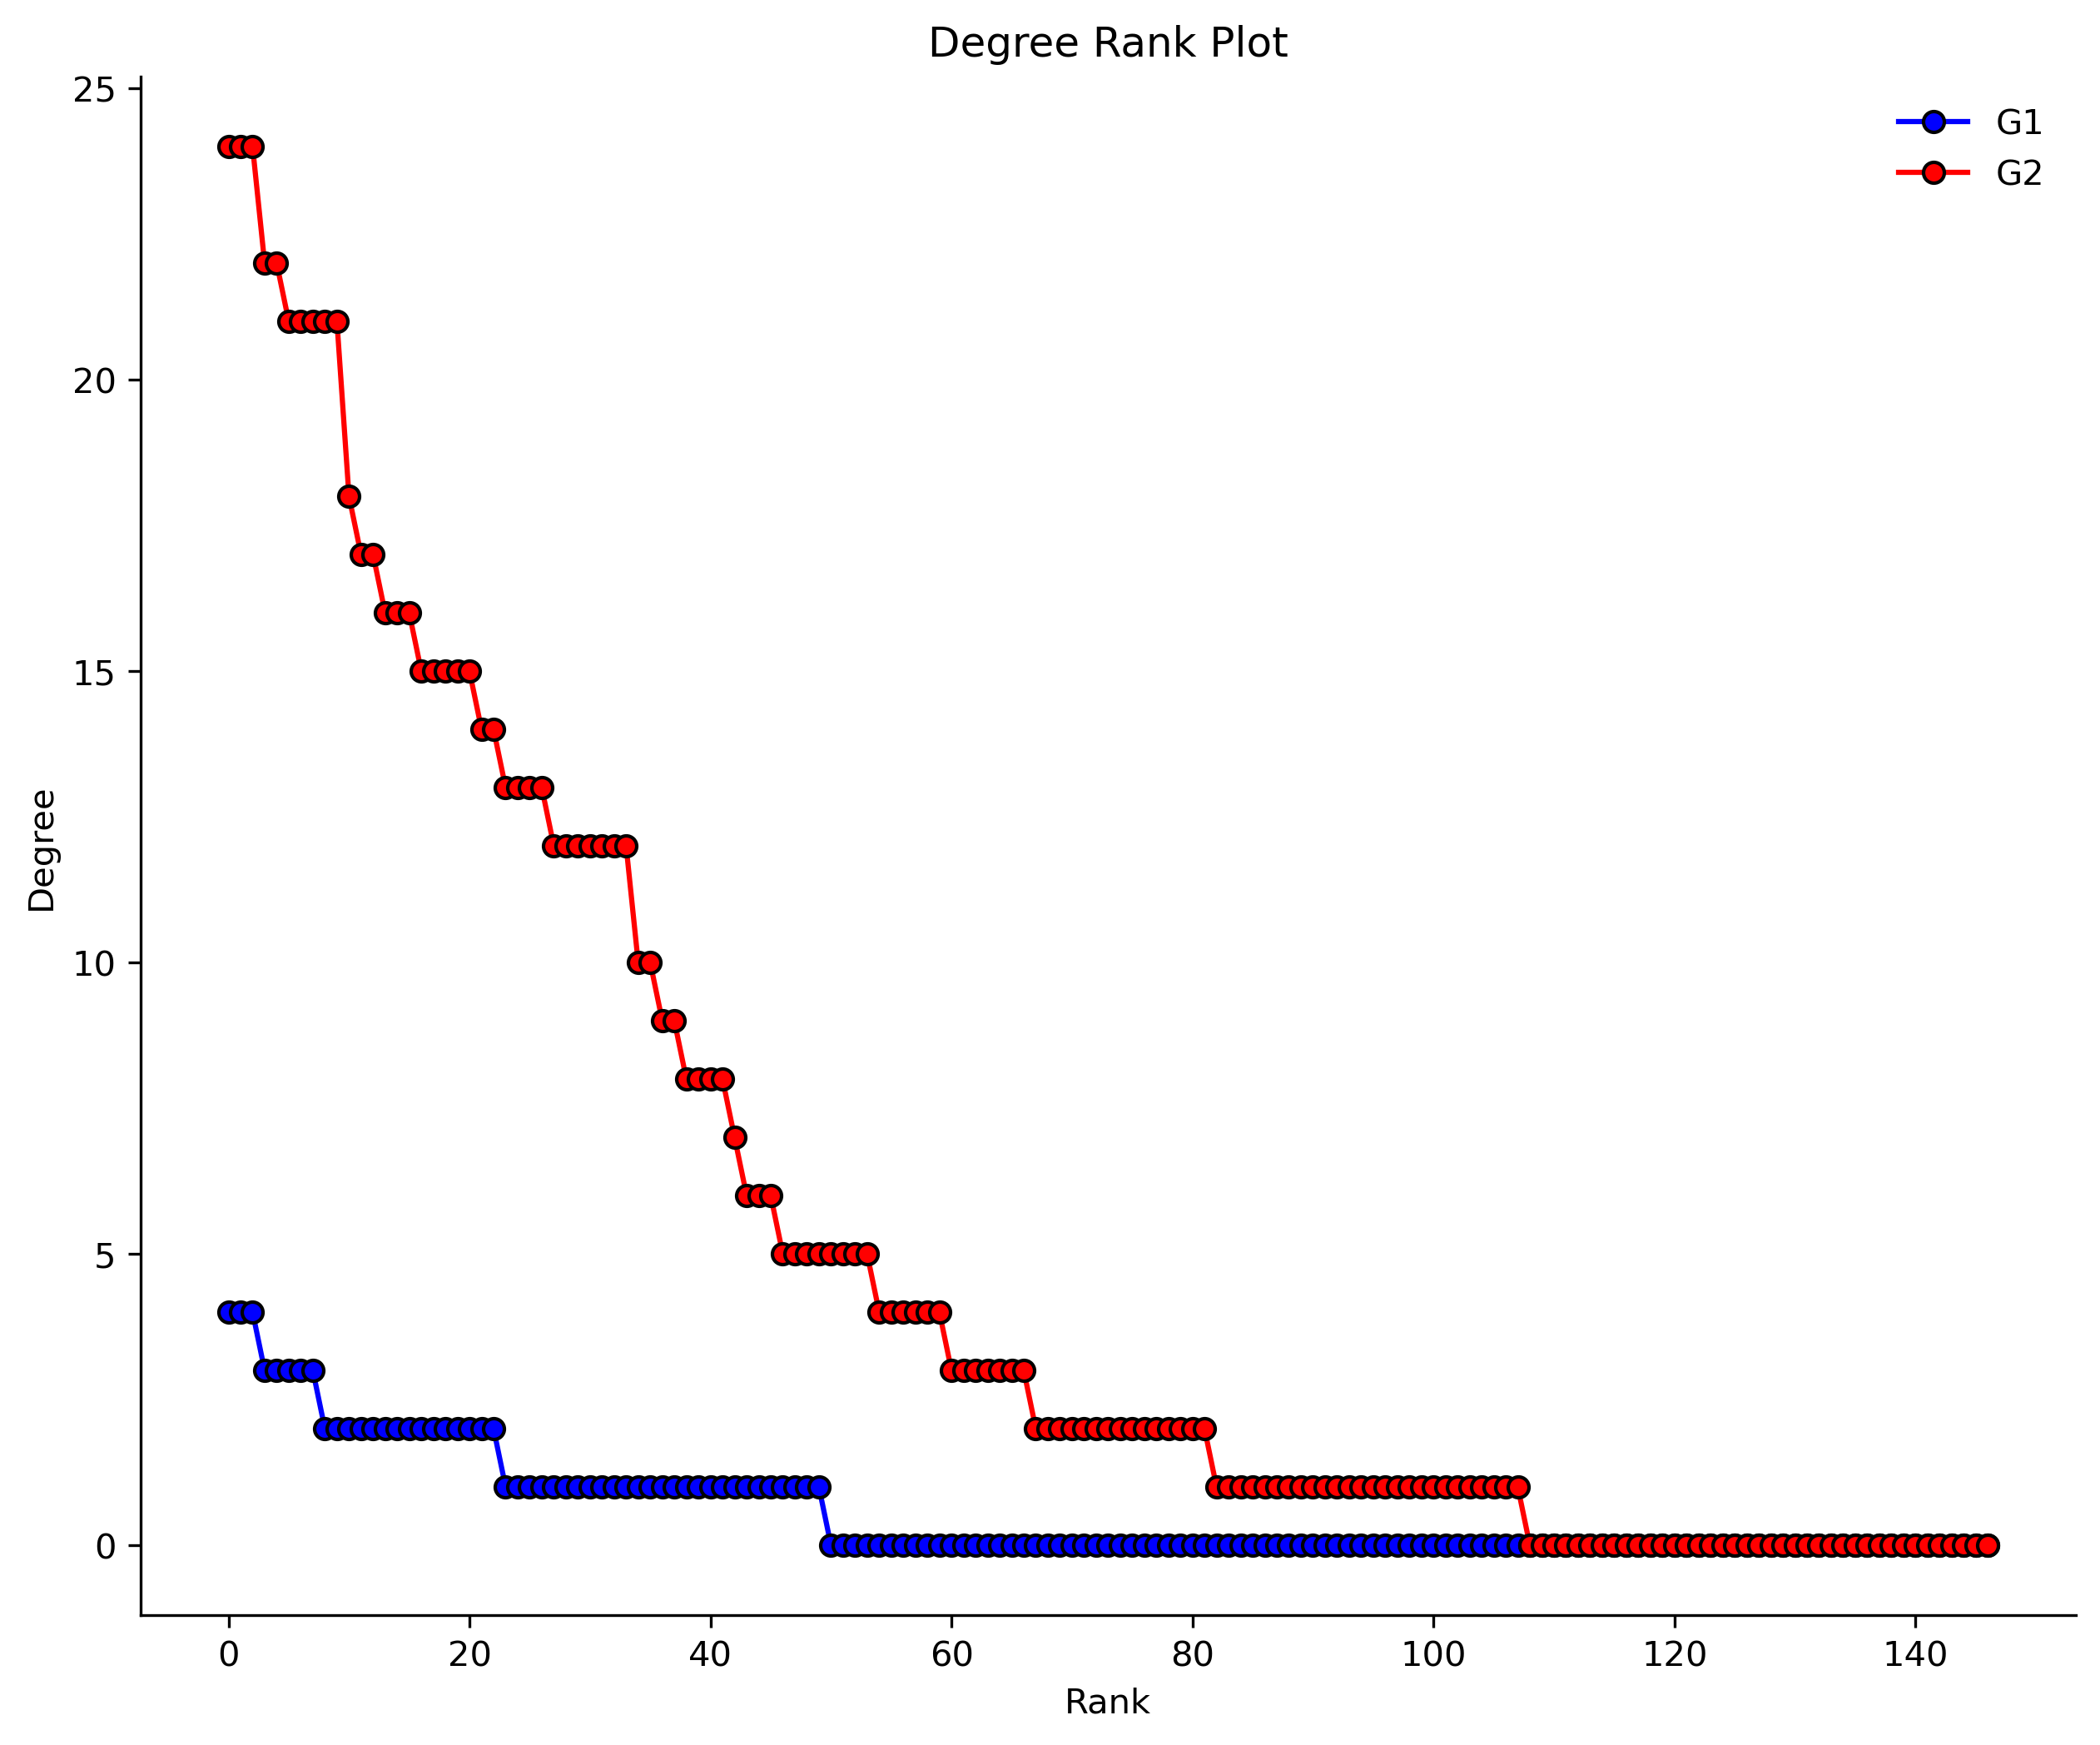

KS statistic: 0.4013605442176871
p-value: 5.744492995116191e-11


In [6]:
net.plot_and_compare_degree_distribution(control_small_analysis.G, chr2_small_analysis.G)

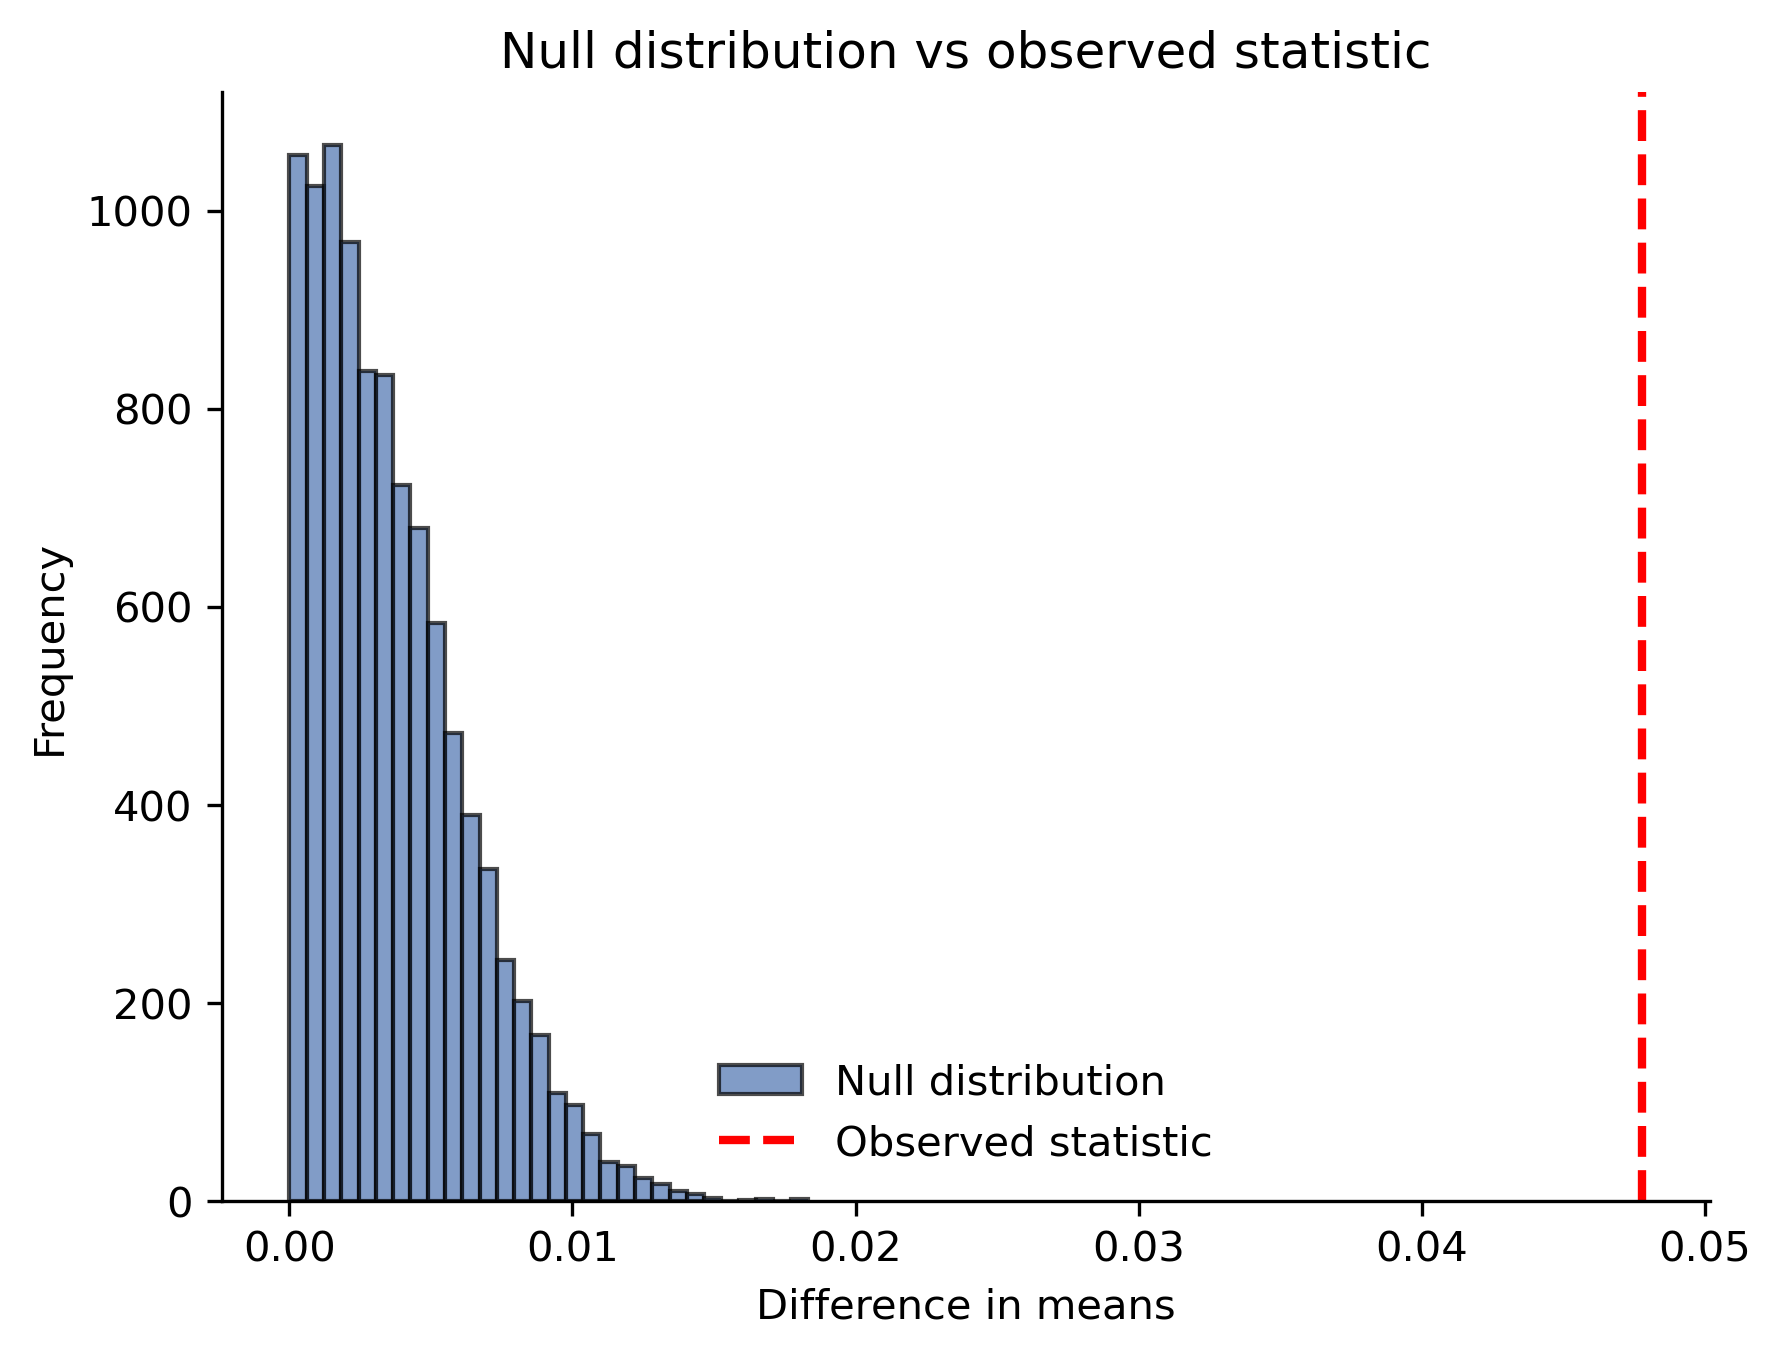

(0.047792206626376066, 0.0)

In [7]:
net.corr_permutation_ttest(chr2_large_analysis.corr_mat, chr2_small_analysis.corr_mat, niters=10000, plot=True)
# net.distance_permutation_test(control_small_analysis.corr_mat, ir_analysis.corr_mat, niters=10000, plot=True)

In [ ]:
a = list(nx.triangles(chr2_large_analysis.G).values())
b = list(nx.triangles(chr2_small_analysis.G).values())
c = list(nx.triangles(control_large_analysis.G).values())
d = list(nx.triangles(control_small_analysis.G).values())
e = list(nx.triangles(ir_analysis.G).values())

In [ ]:
nx.minimum_spanning_tree(ir_analysis.G)

In [ ]:
len(nx.minimum_spanning_tree(ir_analysis.G).edges())

In [ ]:
import seaborn as sns
sns.kdeplot(chr2_small_analysis.corr_mat.flatten(), color="#ed1c24")
sns.kdeplot(chr2_large_analysis.corr_mat.flatten(), color="#2b3990")
sns.kdeplot(control_small_analysis.corr_mat.flatten(), color="#939598")
sns.kdeplot(control_large_analysis.corr_mat.flatten(), color="#bcbec0")
sns.kdeplot(ir_analysis.corr_mat.flatten(), color="#c9877e")
plt.xlabel("Spearman Coefficient")
plt.legend(["ChR2 Small Box", "ChR2 Large Box", "Control Small Box", "Control Large Box", "Natural Recall"])
plt.savefig(r"C:\Users\ryansenne\Desktop\KDE_plot.svg", dpi=900)

In [ ]:
def plot_kde_corr_matrices_upper_tri(*args, labels):
    """ 
    Plot KDE of correlation matrices r values from the upper triangle.

    Parameters:
    *args : Variable length argument list of correlation matrices.
    labels (list): Labels for each matrix in the argument list.

    """

    # Check if the number of arguments and labels are equal
    if not len(args) == len(labels):
        raise ValueError("The number of arguments and labels should be equal.")

    plt.figure(figsize=(10, 7))

    # Loop over each correlation matrix and plot the KDE
    for i, corr_matrix in enumerate(args):

        # Get the upper triangle of the correlation matrix
        upper_tri = corr_matrix[np.triu_indices(corr_matrix.shape[0], k = 1)]

        # Flatten the upper triangular matrix and remove NaN values
        r_values = upper_tri.flatten()
        r_values = r_values[~np.isnan(r_values)]

        # Plot the KDE
        sns.kdeplot(r_values, label=labels[i])

    plt.legend()
    plt.xlabel("Correlation Coefficient (spearman's r)")
    plt.ylabel('Density')
    # plt.title('Kernel Density Estimation of Correlation Coefficients')
    plt.show()

plot_kde_corr_matrices_upper_tri(chr2_small_analysis.corr_mat, 
                                 chr2_large_analysis.corr_mat, 
                                 control_small_analysis.corr_mat, 
                                 control_large_analysis.corr_mat, 
                                 ir_analysis.corr_mat, labels=['ChR2 Small Box', 'ChR2 Large Box', 'Control Small Box', 'Control Large Box', 'Natural Recall'])

In [ ]:
def plot_umap_corr_matrices(*args, labels):
    """ 
    Plot UMAP of correlation matrices where each row in a matrix is an observation.

    Parameters:
    *args : Variable length argument list of correlation matrices.
    labels (list): Labels for each matrix in the argument list.

    """

    # Check if the number of arguments and labels are equal
    if not len(args) == len(labels):
        raise ValueError("The number of arguments and labels should be equal.")

    # Concatenate all the correlation matrices vertically (along axis 0)
    data = np.concatenate(args, axis=0)

    # Perform UMAP dimensionality reduction
    umap = UMAP(n_neighbors=20)
    umap_result = umap.fit_transform(data)

    # Plot the results
    fig = plt.figure(figsize=(10, 7))
    
    # Calculate the cumulative sum of the lengths of the matrices, this will be used to split the umap_result
    lengths = np.cumsum([0] + [arg.shape[0] for arg in args])

    for i, label in enumerate(labels):
        plt.scatter(umap_result[lengths[i]:lengths[i+1], 0], umap_result[lengths[i]:lengths[i+1], 1], label=label, edgecolors="black", linewidth=0.25, color=my_allen_colors)

    # plt.legend()
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    # plt.title('UMAP plot of correlation matrices')
    plt.show()
    return fig, umap_result

fig, umap_result = plot_umap_corr_matrices(chr2_small_analysis.corr_mat, 
                        chr2_large_analysis.corr_mat, 
                        control_small_analysis.corr_mat, 
                        control_large_analysis.corr_mat, 
                        ir_analysis.corr_mat, labels=['ChR2 Small Box', 'ChR2 Large Box', 'Control Small Box', 'Control Large Box', 'Natural Recall'])

fig.savefig(r"C:\Users\ryansenne\Desktop\umap_region.svg", dpi=900)

In [ ]:
labels=['ChR2 Small Box', 'ChR2 Large Box', 'Control Small Box', 'Control Large Box', 'Natural Recall']
colors=["#ed1c24", "#2b3990", "#939598", "#bcbec0", "#c9877e"]

fig = plt.figure(figsize=(10, 7))
    
# Calculate the cumulative sum of the lengths of the matrices, this will be used to split the umap_result
lengths = [0, 147, 147*2, 147*3, 147*4, 147*5]

for i, label in enumerate(labels):
    plt.scatter(umap_result[lengths[i]:lengths[i+1], 0], umap_result[lengths[i]:lengths[i+1], 1], label=label, edgecolors="black", linewidth=0.25, color=colors[i])

plt.legend()
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
# plt.title('UMAP plot of correlation matrices')
plt.show()
fig.savefig(r"C:\Users\ryansenne\Desktop\umap_condition.svg", dpi=900)

In [ ]:
def plot_umap_corr_matrices(*args, labels, colors):
    """ 
    Plot UMAP of correlation matrices where each row in a matrix is an observation.

    Parameters:
    *args : Variable length argument list of correlation matrices.
    labels (list): Labels for each matrix in the argument list.
    colors (list): Colors for each matrix in the argument list.

    """

    # Check if the number of arguments, labels, and colors are equal
    if not len(args) == len(labels) == len(colors):
        raise ValueError("The number of arguments, labels, and colors should be equal.")

    # Concatenate all the correlation matrices vertically (along axis 0)
    data = np.concatenate(args, axis=0)

    # Perform UMAP dimensionality reduction
    umap = UMAP(n_neighbors=12)
    umap_result = umap.fit_transform(data)

    # Plot the results
    fig = plt.figure(figsize=(10, 7))
    
    # Calculate the cumulative sum of the lengths of the matrices, this will be used to split the umap_result
    lengths = np.cumsum([0] + [arg.shape[0] for arg in args])

    for i, label in enumerate(labels):
        plt.scatter(umap_result[lengths[i]:lengths[i+1], 0], umap_result[lengths[i]:lengths[i+1], 1], label=label, color=colors[i], edgecolors="black", linewidth=0.25,)

    plt.legend()
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    # plt.title('UMAP plot of correlation matrices')
    plt.show()
    return fig

fig = plot_umap_corr_matrices(chr2_small_analysis.corr_mat, 
                        chr2_large_analysis.corr_mat, 
                        control_small_analysis.corr_mat, 
                        control_large_analysis.corr_mat, 
                        ir_analysis.corr_mat, labels=['ChR2 Small Box', 'ChR2 Large Box', 'Control Small Box', 'Control Large Box', 'Natural Recall'], colors=["#ed1c24", "#2b3990", "#939598", "#bcbec0", "#c9877e"])
    
fig.savefig(r"C:\Users\ryansenne\Desktop\umap_condition.svg", dpi=900)

In [ ]:
dir(UMAP)